# Title here

Description here

## Table of contents
- [1. Business undestanding](#business)
- [2. Data understanding](#data)
    - [2.1. Gathering data](#gather)
    - [2.2. Assessing data](#assess)
- [3. Prepare data](#prepare)
- [4. Data modeling](#model)
- [5. Evaluate the results](#eval)
- [6. Deploy](#deploy)

<a name="business"></a>
## 1. Business understanding

Text text

> Question 1 \
> Question 2 \
> Question 3 \
> Question 4

<a name="data"></a>
## 2. Data understanding

Text text

<a name="gather"></a>
   

<a name="gather"></a>
### 2.1. Gathering data

First, we need to download all the necessary data. In order to do so, we can run the line below to download all Stack Overflow surveys for all years:

In [27]:
# Download survey data
%run -i '../download/download.py'

# Download shape files
%run -i '../download/shape.py'

These are all the surveys since 2011. We will only use the ones from the last five years. One of the reasons for doing so is that the structure of the survey changed and similar questions might not be comparable anymore. Next, in preparation for the next sections we can import the relevant libraries.

In [21]:
# Import libraries
import country_converter as coco
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a name="assess"></a>
### 2.2. Assessing data

Now that we have downloaded all the datasets let's start by reading the csvs from the past five years. In doing so, I am ignoring the first column as it serves as an ordered identifier for the respondants.

In [120]:
# Import survey data and skip first column
import warnings; warnings.simplefilter('ignore')
survey_2016 = pd.read_csv("../data/survey/survey_2016.csv").iloc[:, 1:]
survey_2017 = pd.read_csv("../data/survey/survey_2017.csv").iloc[:, 1:]
survey_2018 = pd.read_csv("../data/survey/survey_2018.csv").iloc[:, 1:]
survey_2019 = pd.read_csv("../data/survey/survey_2019.csv").iloc[:, 1:]
survey_2020 = pd.read_csv("../data/survey/survey_2020.csv").iloc[:, 1:]

# Import shapefile with geopandas
map_df = gpd.read_file('shapefile/world_countries_2017.shp')

Great! Now we can quickly look at what these datasets look like. I will do that by picking two random samples from the survey.

In [103]:
# Show dataframe for two random samples for 2020
pd.options.display.max_columns = None # to show all columns
survey_2020.sample(2)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
31077,I am a developer by profession,No,34.0,18,Yearly,100000.0,108098.0,France,European Euro,EUR,NaN,NaN,"Developer, desktop or enterprise applications","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,"Languages, frameworks, and other technologies ...",Very satisfied,"I’m not actively looking, but I am open to new...",Java,Java;TypeScript,NaN,NaN,"Jira;Github;Gitlab;Google Suite (Docs, Meet, etc)",Jira;Github;Gitlab;Slack;Trello;Google Suite (...,No,Not very important,Very important,Just because;Curious about other opportunities...,"Read company media, such as employee blogs or ...",Once a decade,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,Indifferent,Stack Overflow (public Q&A for anyone who codes),Call a coworker or friend;Do other work and co...,Linux-based,"10,000 or more employees",Docker;Kubernetes;Linux;Windows,Docker;Kubernetes;Linux;Windows,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per month or weekly,A few times per week,Easy,Too short,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,39.0,16,11
47924,I am a developer by profession,Yes,25.0,16,Yearly,29250.0,31619.0,Netherlands,European Euro,EUR,NaN,NaN,"Developer, game or graphics;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly dissatisfied,"I’m not actively looking, but I am open to new...",C#;C++;Go;Java;Python;Scala,C++;Objective-C,.NET;React Native;Unity 3D,Unity 3D,Confluence;Jira;Github;Gitlab;Slack;Google Sui...,Confluence;Jira;Github;Gitlab;Slack;Google Sui...,No,Neutral,Very important,Having a bad day (or week or month) at work;Be...,Company reviews from third party sites (e.g. G...,Once a year,Yes,Onboarding? What onboarding?,No,Occasionally: 1-2 days per quarter but less th...,NaN,"Hello, old friend",Stack Overflow (public Q&A for anyone who codes),Call a coworker or friend;Visit Stack Overflow,Windows,100 to 499 employees,Android;iOS;Windows,Android;iOS;Windows,I have little or no influence,Straight / Heterosexual,Yes,"No, not really",I have never participated in Q&A on Stack Over...,Daily or almost daily,Easy,Appropriate in length,No,NaN,Angular.js;React.js,NaN,Just as welcome now as I felt last year,40.0,9,1


And for the remaining years we see:

In [105]:
# Random sample for 2019
survey_2019.sample(2)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
77083,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,Greece,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,Taken an online course in programming or softw...,20 to 99 employees,"Developer, full-stack",15,18,12,Neither satisfied nor dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Not sure,I am actively looking for a job,1-2 years ago,Interview with people in senior / management r...,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,EUR,European Euro,1600.0,Monthly,21996.0,40.0,There is a schedule and/or spec (made by me or...,Meetings;Not enough people for the workload;Ti...,Less than once per month / Never,"Other place, such as a coworking space or cafe",A little above average,"Yes, because I see value in code review",2.0,"No, but I think we should","The CTO, CIO, or other management purchase new...",I have little or no influence,Java;JavaScript,Java;JavaScript,Elasticsearch;Oracle,NaN,NaN,Docker,Angular/Angular.js;Other(s):,Angular/Angular.js;Spring;Other(s):,NaN,NaN,IntelliJ;Sublime Text;Visual Studio Code,Windows,I do not use containers,NaN,A passing fad,No,Yes,What?,Facebook,Online,Username,2008,A few times per week,Find answers to specific questions,1-2 times per week,Stack Overflow was slightly faster,0-10 minutes,Not sure / can't remember,NaN,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
41592,"I am not primarily a developer, but I write co...",Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,United States,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Information systems, information technology, o...",Taken an online course in programming or softw...,NaN,Academic researcher;Data scientist or machine ...,10,13,7,Very satisfied,Very satisfied,Very confident,Yes,Not sure,I am not interested in new job opportunities,3-4 years ago,Interview with people in senior / management r...,No,Office environment or company culture;Opportun...,"My job status changed (promotion, new job, etc.)",USD,United States dollar,NaN,Weekly,NaN,NaN,There's no schedule or spec; I work on what se...,Time spent commuting,"More than half, but not all, the time",Home,Average,No,NaN,"No, and I'm glad we don't",Not sure,I have little or no influence,Python,Python;R,NaN,NaN,AWS;Docker;Google Cloud Platform;Kubernetes;Li...,AWS;Docker;Google Cloud Platform;Kubernetes;Li...,NaN,NaN,TensorFlow,TensorFlow;Torch/PyTorch,IPython / Jupyter;Notepad++;RStudio;Vim,Linux-based,NaN,Not at all,A passing fad,Yes,SIGH,What?,WhatsApp,In real life (in person),Login,2014,Daily or almost daily,Find answers to specific questions;Get a sense...,6-10 times per week,Stack Overflow was slightly faster,6

In [106]:
# Random sample for 2018
survey_2018.sample(2)

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
76181,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",NaN,Back-end developer;Database administrator;Full...,0-2 years,0-2 years,Slightly satisfied,Slightly satisfied,Working as a product manager or project manager,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,7.0,1.0,5.0,4.0,2.0,10.0,8.0,3.0,9.0,6.0,1.0,5.0,6.0,4.0,10.0,2.0,9.0,7.0,3.0,11.0,8.0,2.0,1.0,5.0,3.0,4.0,1.0,6.0,4.0,5.0,7.0,3.0,2.0,I saw an employer’s advertisement,U.S. dollars ($),NaN,Weekly,NaN,USD,Confluence;Office / productivity suite (Micros...,Nine months to a year,Taken an online course in programming or softw...,"A book or e-book from O’Reilly, Apress, or a s...",NaN,To improve my general technical skills or prog...,Agree,Neither Agree nor Disagree,Agree,C#;Java;JavaScript;Julia;Python;R;SQL;VB.NET;H...,Groovy;Java;JavaScript;Bash/Shell,MongoDB;Redis;SQL Server;MySQL,MongoDB;Redis;Amazon DynamoDB;Microsoft Azure ...,Arduino,Arduino,Angular;Spring,Angular;Node.js;React;Spring,Eclipse;Notepad++;RStudio,Windows,3,Agile;Kanban;Scrum,Git;Subversion;Team Foundation Version Control...,Multiple times per day,Yes,Yes,The website I was visiting forced me to disabl...,Somewhat disagree,Somewhat agree,Somewhat agree,NaN,2.0,6.0,1.0,5.0,4.0,3.0,7.0,Algorithms making important decisions,Artificial intelligence surpassing human intel...,The developers or the people creating the AI,I'm worried about the dangers more than I'm ex...,Depends on what it is,Depends on what it is,The developer who wrote it,Yes,10 (Very Likely),A few times per month or weekly,Yes,Less than once per month or monthly,"No, I didn't know that Stack Overflow had a jo...",Yes,NaN,Yes,Extremely interested,Extremely interested,Very interested,Very interested,Very interested,Between 7:01 - 8:00 AM,9 - 12 hours,1 - 2 hours,1 - 2 times per week,NaN,3 - 4 times per week,Male,Straight or heterosexual,They never completed any formal education,Ea

In [107]:
# Random sample for 2017
survey_2017.sample(2)

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
46269,Professional developer,No,Colombia,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...",100 to 499 employees,"Sole proprietorship or partnership, not in sta...",11 to 12 years,7 to 8 years,NaN,Web developer,Back-end Web developer,NaN,NaN,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Agree,Agree,Strongly agree,Disagree,Somewhat agree,Agree,Somewhat agree,Agree,Somewhat agree,Disagree,Strongly agree,Agree,Somewhat agree,Somewhat agree,Strongly agree,Somewhat agree,Disagree,"I'm not actively looking, but I am open to new...",NaN,Between 2 and 4 years ago,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Important,Very important,Important,Very important,Important,Important,Important,Very important,Somewhat important,Important,Very important,Annual bonus; Vacation/days off; Health benefi...,No,Glassdoor; LinkedIn,"I completed a major project, assignment, or co...","A friend, family member, or former colleague t...",Very important,Important,Important,Somewhat important,Not very important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,NaN,Somewhat overpaid,Both,Somewhat important,Online course; Industry certification; On-the-...,Official documentation; Tra

In [108]:
# Random sample for 206
survey_2016.sample(2)

,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,occupation_group,experience_range,experience_midpoint,salary_range,salary_midpoint,big_mac_index,tech_do,tech_want,aliens,programming_ability,employment_status,industry,company_size_range,team_size_range,women_on_team,remote,job_satisfaction,job_discovery,dev_environment,commit_frequency,hobby,dogs_vs_cats,desktop_os,unit_testing,rep_range,visit_frequency,why_learn_new_tech,education,open_to_new_job,new_job_value,job_search_annoyance,interview_likelihood,how_to_improve_interview_process,star_wars_vs_star_trek,agree_tech,agree_notice,agree_problemsolving,agree_diversity,agree_adblocker,agree_alcohol,agree_loveboss,agree_nightcode,agree_legacy,agree_mars,important_variety,important_control,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
541,Facebook,Belgium,Western Europe,Western Europe,40-49,44.5,Male,Developer,Embedded application developer,Embedded application developer,11+ years,13.0,"$70,000 - $80,000",75000.0,4.25,Arduino / Raspberry Pi; AngularJS; C++,NaN,No,8.0,Employed full-time,Automotive,"1,000-4,999 employees",5-9 people,0,Never,I'm somewhat dissatisfied with my job,I knew I wanted to work here. I sought out the...,NaN,Multiple times a day,5-10 hours per week,Cats,Mint,Yes,I don't have an account,Once a week,I'm curious,I'm self-taught,"I'm not actively looking, but I am open to new...",Opportunity for advancement,Writing my CV and keeping it updated,20%,Introduce me to the team,Star Wars,Agree completely,Agree somewhat,Agree somewhat,Neutral,Neutral,Disagree completely,Disagree somewhat,Disagree somewhat,Neutral,Disagree completely,This is somewhat important,This is very important,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,I don't care about this,Corporate policies; Non-technical management; ...,To get help for my job
49127,Reddit,Spain,Southern Europe,Western Europe,30-34,32.0,Male,Developer; Engineer; Programmer; Full-stack De...,NaN,NaN,NaN,NaN,NaN,NaN,3.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we have a better sense of what the data looks like, so we can proceed to picking the columns that we will need for the analysis, given the questions we outlines in [Section 1.](#business). These are the following:

The columns that indicate what language respondants want to learn are the following:
> Survey 2020: LanguageWorkedWith \
> Survey 2019: LanguageWorkedWith \
> Survey 2018: LanguageWorkedWith \
> Survey 2017: HaveWorkedLanguage \
> Survey 2016: tech_do

The columns that indicate how satisfied a respondant is with their job are:
> Survey 2020: JobSat \
> Survey 2019: JobSat \
> Survey 2018: JobSatisfaction \
> Survey 2017: JobSatisfaction \
> Survey 2016: job_satisfaction

The columns that indicate education status are the following:
> Survey 2020: EdLevel \
> Survey 2019: EdLevel \
> Survey 2018: FormalEducation \
> Survey 2017: FormalEducation \
> Survey 2016: education

The columns that indicate where the respondant lives are:
> Survey 2020: Country \
> Survey 2019: Country \
> Survey 2018: Country \
> Survey 2017: Country \
> Survey 2016: country

The columns that indicate what is the respondant's developer status are:
> Survey 2020: Gender \
> Survey 2019: Gender \
> Survey 2018: Gender \
> Survey 2017: Gender \
> Survey 2016: gender

The columns that indicate what is the respondant's employment status are:
> Survey 2020: Employment \
> Survey 2019: Employment \
> Survey 2018: Employment \
> Survey 2017: EmploymentStatus \
> Survey 2016: employment_status


Lastly, we can take a loop at the shapefiles we imported:

In [ ]:
# Head of shapefiles
map_df.head()

So the countries are in the variable CNTRY_NAME. We will need to match these with our data and for that we will have to harmonize all the country names in [Section 3.](#prepare)

Given all of the above we can proceed to prepare our data!

<a name="prepare"></a>
## 3. Prepare data

Since we already know which columns we will need in order to answer our questions we can first start by droping columns that are not relevant to us:

In [130]:
# Put relevant variables in list
keep_2020 = ['LanguageWorkedWith', 'JobSat', 'EdLevel', 'Country', 'Gender', 'Employment']
keep_2019 = ['LanguageWorkedWith', 'JobSat', 'EdLevel', 'Country', 'Gender', 'Employment']
keep_2018 = ['LanguageWorkedWith', 'JobSatisfaction', 'FormalEducation', 'Country', 'Gender', 'Employment']
keep_2017 = ['HaveWorkedLanguage', 'JobSatisfaction', 'FormalEducation', 'Country', 'Gender', 'EmploymentStatus']
keep_2016 = ['tech_do', 'job_satisfaction', 'education', 'country', 'gender', 'employment_status']

# Keep only relevant variables
survey_2020 = survey_2020[keep_2020]
survey_2019 = survey_2019[keep_2019]
survey_2018 = survey_2018[keep_2018]
survey_2017 = survey_2017[keep_2017]
survey_2016 = survey_2016[keep_2016]

Nice! Now we can rename the columns so that all dataframes have the same names for variables

In [218]:
# Rename columns
survey_2020.rename(columns={'LanguageWorkedWith': 'languages', 'JobSat': 'job_satisfaction', 
                           'EdLevel': 'education', 'Country': 'country', 'Gender': 'gender', 
                           'Employment': 'employment'}, inplace = True)
survey_2019.rename(columns={'LanguageWorkedWith': 'languages', 'JobSat': 'job_satisfaction', 
                           'EdLevel': 'education', 'Country': 'country', 'Gender': 'gender', 
                           'Employment': 'employment'}, inplace = True)
survey_2018.rename(columns={'LanguageWorkedWith': 'languages', 'JobSatisfaction': 'job_satisfaction', 
                           'FormalEducation': 'education', 'Country': 'country', 'Gender': 'gender', 
                           'Employment': 'employment'}, inplace = True)
survey_2017.rename(columns={'LanguageWorkedWith': 'languages', 'JobSatisfaction': 'job_satisfaction', 
                           'FormalEducation': 'education', 'Country': 'country', 'Gender': 'gender', 
                           'EmploymentStatus': 'employment'}, inplace = True)
survey_2016.rename(columns={'tech_do': 'languages', 'job_satisfaction': 'job_satisfaction', 
                           'education': 'education', 'country': 'country', 'gender': 'gender', 
                           'employment_status': 'employment'}, inplace = True);

Now we need to harmonize the answers to different questions for all survey years in order to merge them and have a complete data set. Let's with some an easy one and look at the category for gender in each year.

In [267]:
# Print unique gender categories in 2020
survey_2020['gender'].unique()

array(['Male', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [259]:
# Print unique gender categories in 2019
survey_2019['gender'].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [261]:
# Print unique gender categories in 2018
survey_2018['gender'].unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming', 'Transgender',
       'Female;Transgender',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender', 'Female;Male;Transgender',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [262]:
# Print unique gender categories in 2017
survey_2017['gender'].unique()

array(['Male', nan, 'Female', 'Gender non-conforming', 'Other',
       'Male; Gender non-conforming', 'Female; Transgender',
       'Male; Female', 'Male; Other', 'Transgender',
       'Transgender; Gender non-conforming',
       'Female; Gender non-conforming',
       'Male; Female; Transgender; Gender non-conforming; Other',
       'Male; Female; Transgender', 'Male; Female; Other',
       'Male; Female; Transgender; Gender non-conforming',
       'Male; Transgender', 'Female; Transgender; Gender non-conforming',
       'Gender non-conforming; Other',
       'Male; Female; Gender non-conforming', 'Female; Other',
       'Male; Transgender; Gender non-conforming', 'Transgender; Other',
       'Male; Gender non-conforming; Other',
       'Female; Gender non-conforming; Other',
       'Male; Female; Gender non-conforming; Other',
       'Female; Transgender; Other',
       'Female; Transgender; Gender non-conforming; Other',
       'Male; Transgender; Other', 'Male; Female; Transgender;

In [263]:
# Print unique gender categories in 2016
survey_2016['gender'].unique()

array(['Male', nan, 'Female', 'Prefer not to disclose', 'Other'],
      dtype=object)

Given what we see above, let's cluster all in the following four categories: female, male, other, nan. We can define a function to assing the value of Male, Female, Other or nan.

In [265]:
# Define function to harmonize gender
def harmonize_gender(df_raw):
    '''This function unifies all gender categories into 
    four: Male, Female, Other and nan
    '''
    # Copy df_raw
    df = df_raw.copy()
    # Loop over rows
    for i in df.index:
        # Define gender
        gender = str(df.loc[i, 'gender']).lower()
        # Value if male or man
        if gender == 'male' or gender == 'man':
            df.loc[i, 'gender'] = 'Male'
        # Value if female or woman
        elif gender == 'female' or gender == 'woman':
            df.loc[i, 'gender'] == 'Female'
        # Assign null values
        elif gender == 'nan':
            df.loc[i, 'gender'] == np.nan
        # Other categories lumped into other
        else:
            df.loc[i, 'gender'] == 'Other'
    # Return harmonized dataframe
    return(df)

# Apply gender harmonizer
survey_2020 = harmonize_gender(survey_2020)
survey_2019 = harmonize_gender(survey_2019)
survey_2018 = harmonize_gender(survey_2018)
survey_2017 = harmonize_gender(survey_2017)
survey_2016 = harmonize_gender(survey_2016)

Similarly, for job satisfaction we can look at the possible values

In [266]:
# Print unique job satisfaction categories in 2020
survey_2020['job_satisfaction'].unique()

['Slightly satisfied',
 'Very dissatisfied',
 nan,
 'Slightly dissatisfied',
 'Very satisfied',
 'Neither satisfied nor dissatisfied']

In [269]:
# Print unique job satisfaction categories in 2019
survey_2019['job_satisfaction'].unique()

array([nan, 'Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very satisfied',
       'Very dissatisfied'], dtype=object)

In [271]:
# Print unique job satisfaction categories in 2018
survey_2018['job_satisfaction'].unique()

array(['Extremely satisfied', 'Moderately dissatisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', nan, 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [272]:
# Print unique job satisfaction categories in 2017
survey_2017['job_satisfaction'].unique()

array([nan,  9.,  3.,  8.,  6.,  7.,  5.,  4., 10.,  2.,  0.,  1.])

In [273]:
# Print unique job satisfaction categories in 2016
survey_2016['job_satisfaction'].unique()

array([nan, 'I love my job', "I don't have a job",
       "I'm somewhat satisfied with my job",
       "I'm somewhat dissatisfied with my job",
       "I'm neither satisfied nor dissatisfied", 'Other (please specify)',
       'I hate my job'], dtype=object)

We will try to lump all categories into six categories: Very satisfied, satisfied, Neither, Dissatisfied, Very dissatisfied and nan. We will take a similar approach to gender and define a function to do this.

With that in hands we can add a variable at the end of each dataset to mark the year it represents and merge them

In [228]:
# Add year variable to dataframes
survey_2020['year'] = 2020
survey_2019['year'] = 2019
survey_2018['year'] = 2018
survey_2017['year'] = 2017
survey_2016['year'] = 2016

# Merge datasets into one
data = [survey_2020, survey_2019, survey_2018, survey_2017, survey_2016]
survey = pd.concat(data)

Another thing that we need to prepare in order to later match the surveys and the shapefile datasets is the country names. In order to have exact matches between the country names in the survey and shapefile data we can convert all the names using a regex to an ISO3 name and then match them. Luckily, the packate country-converter does that for us.

In [ ]:
# List of survey files
dfs = [survey_2020, survey_2019, survey_2018, survey_2017, survey_2016]



In [139]:
survey_2018['JobSatisfaction'].unique()

array(['Extremely satisfied', 'Moderately dissatisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', nan, 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

<a name="model"></a>
## 4. Data modeling

Text text

<a name="eval"></a>
## 5. Evaluate the results

Text text

<a name="deploy"></a>
## 6. Deploy

Text text

In [141]:
os.getcwd()

'/Users/gabrielsgaspar/Projects/personal_projects/Write-A-Data-Science-Blog-Post/data'

In [140]:
import geopandas as gpd

In [142]:
map_df = gpd.read_file('IPUMSI_world_release2017/world_countries_2017.shp')

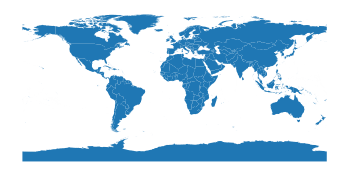

In [165]:
ax = map_df.plot()
ax.axis('off');

In [164]:
map_df.head()

,OBJECTID,CNTRY_NAME,CNTRY_CODE,BPL_CODE,geometry
0,1,Algeria,012,13010.0,"MULTIPOLYGON (((-2.05592 35.07370, -2.05675 35..."
1,2,Angola,024,12010.0,"MULTIPOLYGON (((12.79760 -4.41685, 12.79875 -4..."
2,3,In dispute South Sudan/Sudan,9999,99999.0,"POLYGON ((28.08408 9.34722, 28.03889 9.34722, ..."
3,4,Benin,204,15010.0,"MULTIPOLYGON (((1.93753 6.30122, 1.93422 6.299..."
4,5,Botswana,072,14010.0,"POLYGON ((25.16312 -17.77816, 25.16383 -17.778..."


In [152]:
countries = map_df['CNTRY_NAME'].unique().tolist()

In [157]:
'Bahamas' in countries

False

In [169]:
countries2 = survey_2020['Country'].unique().tolist()

In [199]:
import country_converter as coco

iso_lst1 = []
iso_lst2 = []

for country in countries:
    iso1 = coco.convert(names=country, to='ISO3')
    iso_lst1.append(iso1)

for country2 in countries2:
    iso2 = coco.convert(names=country2, to='ISO3')
    iso_lst2.append(iso2)


In [201]:
for i in iso_lst2:
    print(i, i in iso_lst1)

DEU True
GBR True
RUS True
ALB True
USA True
IND True
TUN True
ESP True
NLD True
FRA True
BEL True
PRT True
CAN True
CHN True
UKR True
ITA True
BRA True
AUT True
MEX True
SWE True
POL True
IDN True
GRC True
ISR True
CZE True
BIH True
BGR True
SRB True
CHE True
HUN True
NPL True
SVN True
URY True
DNK True
PAK True
TWN True
ROU True
FIN True
CRI True
NGA True
CHL True
TUR True
PAN True
IRL True
EST True
PHL True
AUS True
not found True
PER True
CYP True
LKA True
KEN True
NOR True
KGZ True
IRN True
HRV True
EGY True
ARG True
GHA True
LVA True
MAR True
BGD True
ECU True
HTI True
VEN True
COL True
LTU True
SLV True
HND True
ETH True
LBN True
UGA True
DZA True
VNM True
GTM True
SYR True
AFG True
SVK True
ARE True
BLR True
SDN True
ZAF True
JOR True
GEO True
TZA True
ATG True
SAU True
NZL True
KWT True
ARM True
MDA True
CUB True
LUX True
SGP True
AZE True
DOM True
ISL True
IMN True
UZB True
TTO True
SEN True
AND True
TKM True
HKG True
BEN True
BOL True
KOR True
JPN True
MLT True
IRQ True
KOR 

In [182]:
'US' in iso_lst1

False

In [196]:
coco.convert(names='United States of America', to='ISO3')

'USA'

In [200]:
'USA' in iso_lst2

True

In [207]:
for i in survey_2020.index:
    survey_2020.loc[i, 'Country'] = coco.convert(names = str(survey_2020.loc[i, 'Country']), to = 'ISO3')

In [208]:
survey_2020.head()

,LanguageWorkedWith,JobSat,EdLevel,Country,Gender,Employment
0,C#;HTML/CSS;JavaScript,Slightly satisfied,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",DEU,Man,"Independent contractor, freelancer, or self-em..."
1,JavaScript;Swift,Very dissatisfied,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",GBR,NaN,Employed full-time
2,Objective-C;Python;Swift,NaN,NaN,RUS,NaN,NaN
3,NaN,Slightly dissatisfied,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",ALB,Man,NaN
4,HTML/CSS;Ruby;SQL,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",USA,Man,Employed full-time
